In [1]:
import torch
import torch.nn.functional as F

In [2]:
# Load the entire collection of K caches from all timesteps
all_v_caches = torch.load("all_v_caches.pt")

/tmp/ipykernel_839132/2415796608.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_v_caches = torch.load("all_v_caches.pt")


In [3]:
# Define which steps and block to compare
step_t = 5
step_t_plus_1 = 6
block_key = 'double_0'

In [4]:
# 2. Get the two K tensors
v_tensor_t = all_v_caches[step_t][block_key]
v_tensor_t_plus_1 = all_v_caches[step_t_plus_1][block_key]

# # Ensure tensors are on the same device (e.g., CPU) for comparison
# v_tensor_t = v_tensor_t.to('cpu')
# v_tensor_t_plus_1 = v_tensor_t_plus_1.to('cpu')

In [5]:
# 3. Flatten the tensors to treat them as 1D vectors
v_tensor_t_flat = v_tensor_t.flatten()
v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

In [6]:
# 4. Calculate cosine similarity
# We add unsqueeze(0) because the function expects a batch dimension
similarity = F.cosine_similarity(v_tensor_t_flat.unsqueeze(0), v_tensor_t_plus_1_flat.unsqueeze(0))

# 5. Print the result
print(f"Cosine similarity for block '{block_key}' between step {step_t} and {step_t_plus_1}: {similarity.item():.4f}")

Cosine similarity for block 'double_0' between step 5 and 6: 1.0000


In [7]:
step_t = 5
step_t_plus_1 = 6

# Get all the block keys from one of the dictionaries (e.g., the first one)
block_keys = all_v_caches[0].keys()

print(f"\n--- Comparing Timestep {step_t} and {step_t_plus_1} ---\n")

# Loop through all block keys
for key in block_keys:
    # Get the two K tensors
    v_tensor_t = all_v_caches[step_t][key]
    v_tensor_t_plus_1 = all_v_caches[step_t_plus_1][key]

    # Flatten the tensors
    v_tensor_t_flat = v_tensor_t.flatten()
    v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

    # Calculate cosine similarity
    similarity = F.cosine_similarity(v_tensor_t_flat.unsqueeze(0), v_tensor_t_plus_1_flat.unsqueeze(0))

    # Print the result for the current block
    print(f"Block '{key}': Similarity = {similarity.item():.4f}")


--- Comparing Timestep 5 and 6 ---

Block 'double_0': Similarity = 1.0000
Block 'double_1': Similarity = 0.9961
Block 'double_2': Similarity = 1.0000
Block 'double_3': Similarity = 0.9961
Block 'double_4': Similarity = 0.9922
Block 'double_5': Similarity = 0.9844
Block 'double_6': Similarity = 0.9844
Block 'double_7': Similarity = 0.9805
Block 'double_8': Similarity = 0.9766
Block 'double_9': Similarity = 0.9688
Block 'double_10': Similarity = 0.9688
Block 'double_11': Similarity = 0.9531
Block 'double_12': Similarity = 0.9531
Block 'double_13': Similarity = 0.9375
Block 'double_14': Similarity = 0.9258
Block 'double_15': Similarity = 0.9258
Block 'double_16': Similarity = 0.9102
Block 'double_17': Similarity = 0.9219
Block 'double_18': Similarity = 0.9062
Block 'double_19': Similarity = 0.9102
Block 'single_0': Similarity = 0.9023
Block 'single_1': Similarity = 0.8906
Block 'single_2': Similarity = 0.9062
Block 'single_3': Similarity = 0.9453
Block 'single_4': Similarity = 0.9414
Blo

In [8]:
step_t = 4
step_t_plus_1 = 9

# Get all the block keys from one of the dictionaries (e.g., the first one)
block_keys = all_v_caches[0].keys()

print(f"\n--- Comparing Timestep {step_t} and {step_t_plus_1} ---\n")

# Loop through all block keys
for key in block_keys:
    # Get the two K tensors
    v_tensor_t = all_v_caches[step_t][key]
    v_tensor_t_plus_1 = all_v_caches[step_t_plus_1][key]

    # Flatten the tensors
    v_tensor_t_flat = v_tensor_t.flatten()
    v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

    # Calculate cosine similarity
    similarity = F.cosine_similarity(v_tensor_t_flat.unsqueeze(0), v_tensor_t_plus_1_flat.unsqueeze(0))

    # Print the result for the current block
    print(f"Block '{key}': Similarity = {similarity.item():.4f}")


--- Comparing Timestep 4 and 9 ---

Block 'double_0': Similarity = 0.9531
Block 'double_1': Similarity = 0.9492
Block 'double_2': Similarity = 0.9258
Block 'double_3': Similarity = 0.8633
Block 'double_4': Similarity = 0.8594
Block 'double_5': Similarity = 0.8008
Block 'double_6': Similarity = 0.7852
Block 'double_7': Similarity = 0.7695
Block 'double_8': Similarity = 0.7344
Block 'double_9': Similarity = 0.7266
Block 'double_10': Similarity = 0.6914
Block 'double_11': Similarity = 0.6680
Block 'double_12': Similarity = 0.6406
Block 'double_13': Similarity = 0.6289
Block 'double_14': Similarity = 0.6094
Block 'double_15': Similarity = 0.5977
Block 'double_16': Similarity = 0.5664
Block 'double_17': Similarity = 0.6211
Block 'double_18': Similarity = 0.5781
Block 'double_19': Similarity = 0.5977
Block 'single_0': Similarity = 0.5469
Block 'single_1': Similarity = 0.5352
Block 'single_2': Similarity = 0.5742
Block 'single_3': Similarity = 0.7578
Block 'single_4': Similarity = 0.7031
Blo

In [9]:
# Creating a heatmap of similarities across all blocks between two timesteps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similarity_heatmap(step_t, step_t_plus_1):
    # Heatmap data
    heatmap_data = []
    block_labels = []
    for key in block_keys:
        v_tensor_t = all_v_caches[step_t][key]
        v_tensor_t_plus_1 = all_v_caches[step_t_plus_1][key]

        v_tensor_t_flat = v_tensor_t.flatten()
        v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

        similarity = F.cosine_similarity(v_tensor_t_flat.unsqueeze(0), v_tensor_t_plus_1_flat.unsqueeze(0))
        
        heatmap_data.append(similarity.item())
        block_labels.append(key)
        
    heatmap_data = np.array(heatmap_data).reshape(1, -1)  # Reshape for heatmap

    # Create the heatmap
    plt.figure(figsize=(15, 1))
    sns.heatmap(heatmap_data, xticklabels=block_labels, yticklabels=["Similarity"], cmap="coolwarm", cbar=True)
    plt.title(f"Cosine Similarity Heatmap between Timestep {step_t} and {step_t_plus_1}")
    plt.xlabel("Blocks")
    # plt.ylabel("Similarity")
    plt.show()



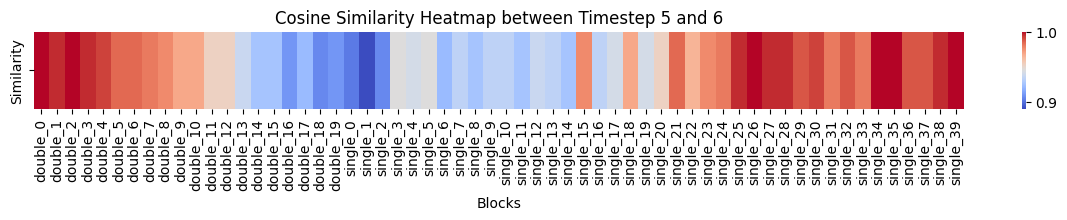

In [10]:
plot_similarity_heatmap(5, 6)

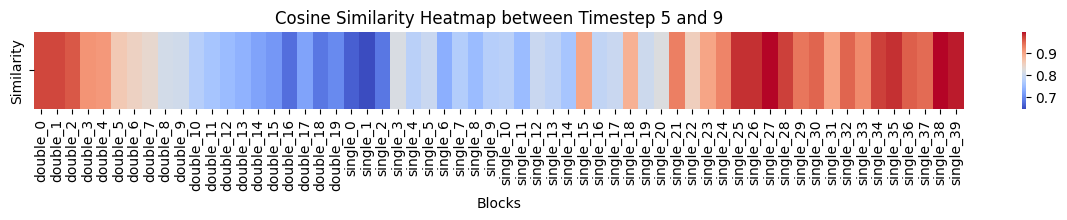

In [11]:
plot_similarity_heatmap(5, 9)

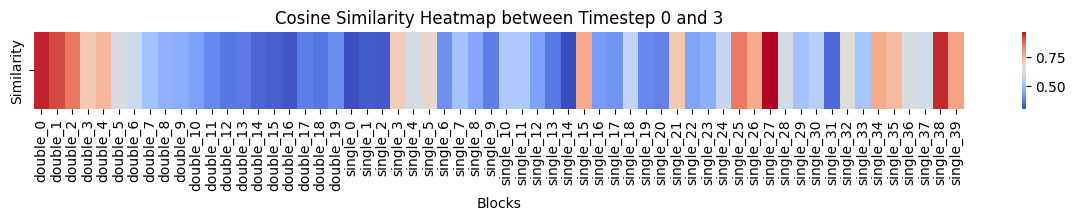

In [12]:
plot_similarity_heatmap(0, 3)

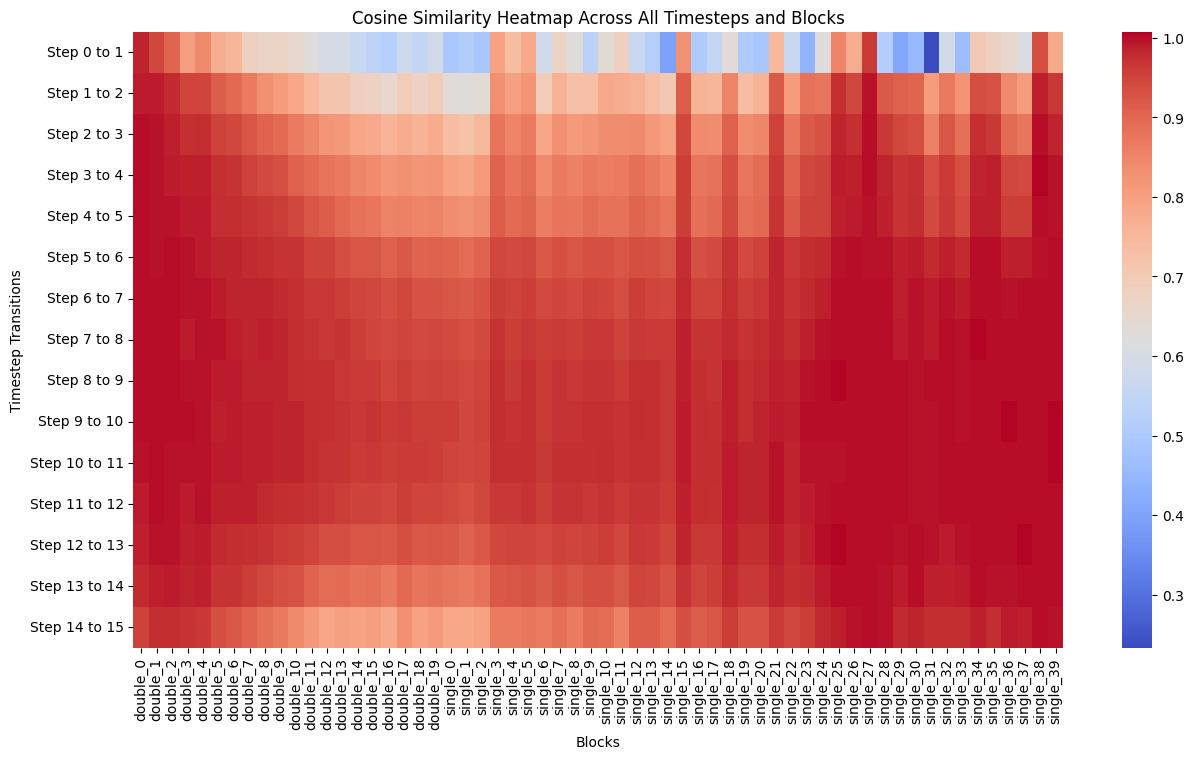

In [13]:
# Building a 2D heatmap to compare across all the timesteps
def plot_full_similarity_heatmap():
    num_steps = len(all_v_caches)
    num_blocks = len(block_keys)
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for i in range(num_steps - 1):
        for j, key in enumerate(block_keys):
            v_tensor_t = all_v_caches[i][key]
            v_tensor_t_plus_1 = all_v_caches[i + 1][key]

            v_tensor_t_flat = v_tensor_t.flatten()
            v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

            similarity = F.cosine_similarity(v_tensor_t_flat.unsqueeze(0), v_tensor_t_plus_1_flat.unsqueeze(0))
            full_heatmap_data[i, j] = similarity.item()
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(full_heatmap_data, xticklabels=block_keys, yticklabels=[f"Step {i} to {i+1}" for i in range(num_steps - 1)], cmap="coolwarm", cbar=True)
    plt.title("Cosine Similarity Heatmap Across All Timesteps and Blocks")
    plt.xlabel("Blocks")
    plt.ylabel("Timestep Transitions")
    plt.show()

plot_full_similarity_heatmap()

The Horizontal Pattern (Across Blocks): Just as we saw before, in almost every row, the similarity is highest for the first few double blocks and the last ~15 single blocks. There's a consistent "dip" in similarity in the middle blocks.

## For each step

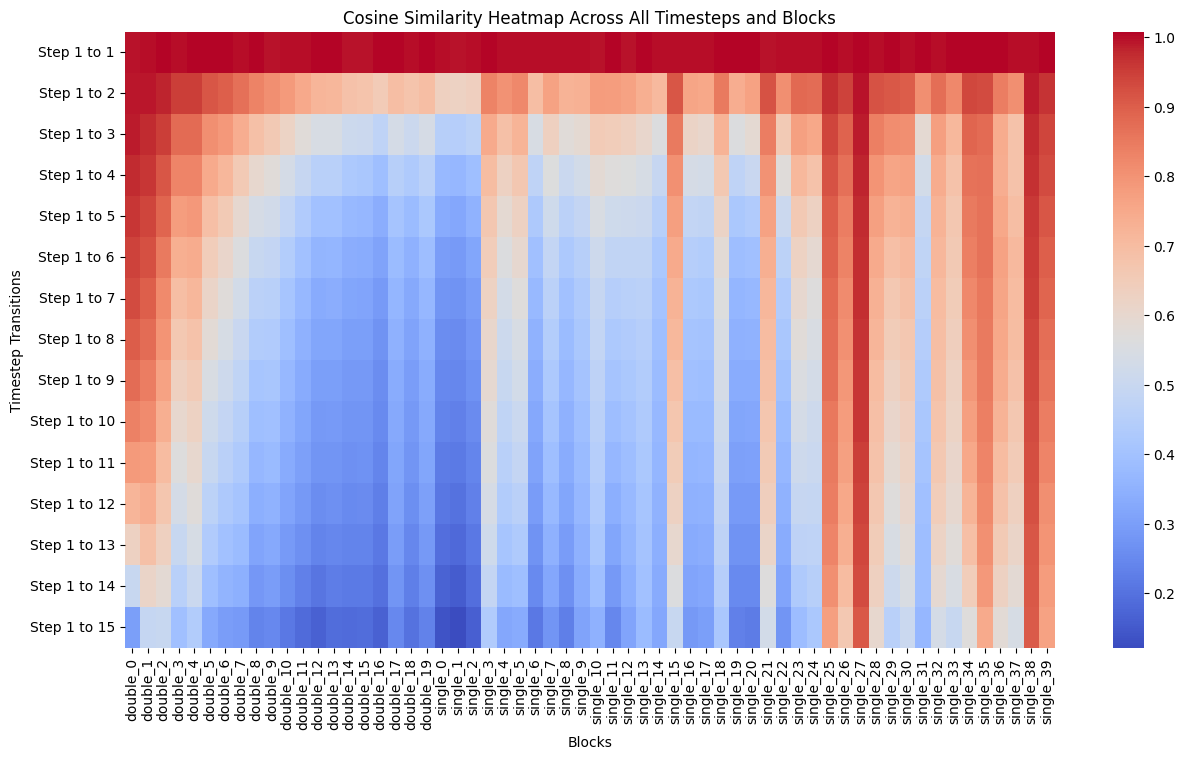

In [14]:
# Building a 2D heatmap to compare across all the timesteps
def plot_full_similarity_heatmap(step):
    num_steps = len(all_v_caches)
    num_blocks = len(block_keys)
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for i in range(num_steps - 1):
        for j, key in enumerate(block_keys):
            v_tensor_t = all_v_caches[step][key]
            v_tensor_t_plus_1 = all_v_caches[i + 1][key]

            v_tensor_t_flat = v_tensor_t.flatten()
            v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

            similarity = F.cosine_similarity(v_tensor_t_flat.unsqueeze(0), v_tensor_t_plus_1_flat.unsqueeze(0))
            full_heatmap_data[i, j] = similarity.item()
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(full_heatmap_data, xticklabels=block_keys, yticklabels=[f"Step {step} to {i+1}" for i in range(num_steps - 1)], cmap="coolwarm", cbar=True)
    plt.title("Cosine Similarity Heatmap Across All Timesteps and Blocks")
    plt.xlabel("Blocks")
    plt.ylabel("Timestep Transitions")
    plt.show()

plot_full_similarity_heatmap(1)

In [15]:
# Doing the same for all the timesteps by first constructing full_heatmap_data without plotting
def get_full_similarity_data(threshold):
    num_steps = len(all_v_caches)
    # Get the block keys
    block_keys_view = all_v_caches[0].keys()

    # Convert the view object to a list
    block_keys = list(block_keys_view)
    num_blocks = len(block_keys)

    # Initialize a dictionary to hold last steps above threshold for each block of each step
    all_last_steps_above_threshold = {}
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for step in range(num_steps):
        for i in range(num_steps - 1):
            for j, key in enumerate(block_keys):
                k_tensor_t = all_v_caches[step][key]
                k_tensor_t_plus_1 = all_v_caches[i + 1][key]

                k_tensor_t_flat = k_tensor_t.flatten()
                k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

                similarity = F.cosine_similarity(
                    k_tensor_t_flat.unsqueeze(0), 
                    k_tensor_t_plus_1_flat.unsqueeze(0)
                )
                full_heatmap_data[i, j] = similarity.item()

        for j in range(full_heatmap_data.shape[1]):
            block_key = block_keys[j]
            # block_keys = list(all_v_caches[0].keys())
            last_step_above_threshold = -1
            for i in range(full_heatmap_data.shape[0]):
                while full_heatmap_data[i, j] >= threshold:
                    last_step_above_threshold = i
                    break
            if step not in all_last_steps_above_threshold:
                all_last_steps_above_threshold[step] = {}
            all_last_steps_above_threshold[step][block_key] = last_step_above_threshold


    return all_last_steps_above_threshold

In [16]:
all_last_steps_above_threshold = get_full_similarity_data(0.97)

In [17]:
# Finding steps where we need to re-calculate k because similarity has dropped below the threshold using all_last_steps_above_threshold for all blocks
def find_recalculate_steps(all_last_steps_above_threshold):
    #Initialize recalculate_steps dictionary using all_last_steps_above_threshold[0]
    recalculate_steps = {block: [last_step + 1] for block, last_step in all_last_steps_above_threshold.get(0, {}).items()}  # +1 to get the next step where recalculation is needed
    num_steps = len(all_v_caches)
    for step in range(0, num_steps):
        for block, last_step in all_last_steps_above_threshold.get(step, {}).items():
            if step == recalculate_steps.get(block, [-1])[-1]:  # Only add if it's a new step
                recalculate_steps.setdefault(block, []).append(last_step + 1)

    return recalculate_steps

def create_recompute_schedule(reuse_recipe):
    """
    Simulates the reuse strategy to create a definitive schedule of recompute steps.

    Args:
        reuse_recipe (dict): A dictionary of shape {step: {block_key: reuse_duration}}.

    Returns:
        dict: A dictionary where keys are block names and values are a list of
              timesteps where a recomputation is required.
    """
    if not reuse_recipe:
        return {}

    block_keys = reuse_recipe[0].keys()
    recompute_schedule = {block: [] for block in block_keys}
    next_compute_step = {block: 0 for block in block_keys}
    num_steps = len(reuse_recipe)

    for t in range(num_steps-1):
        for block_key in block_keys:
            # If the current step is at or after the next scheduled compute step...
            if t >= next_compute_step[block_key]:
                # ...then we must recompute.
                recompute_schedule[block_key].append(t)
                
                # Look up how long we can reuse this newly computed cache.
                reuse_duration = reuse_recipe[t].get(block_key, 0)
                
                # Schedule the next recomputation.
                next_compute_step[block_key] = reuse_duration + 1
                
    return recompute_schedule

# find_recalculate_steps(all_last_steps_above_threshold)
recompute_schedule_v = create_recompute_schedule(all_last_steps_above_threshold)

# Saving recompute_schedule_v to a .pt file
torch.save(recompute_schedule_v, "recompute_schedule_v.pt")

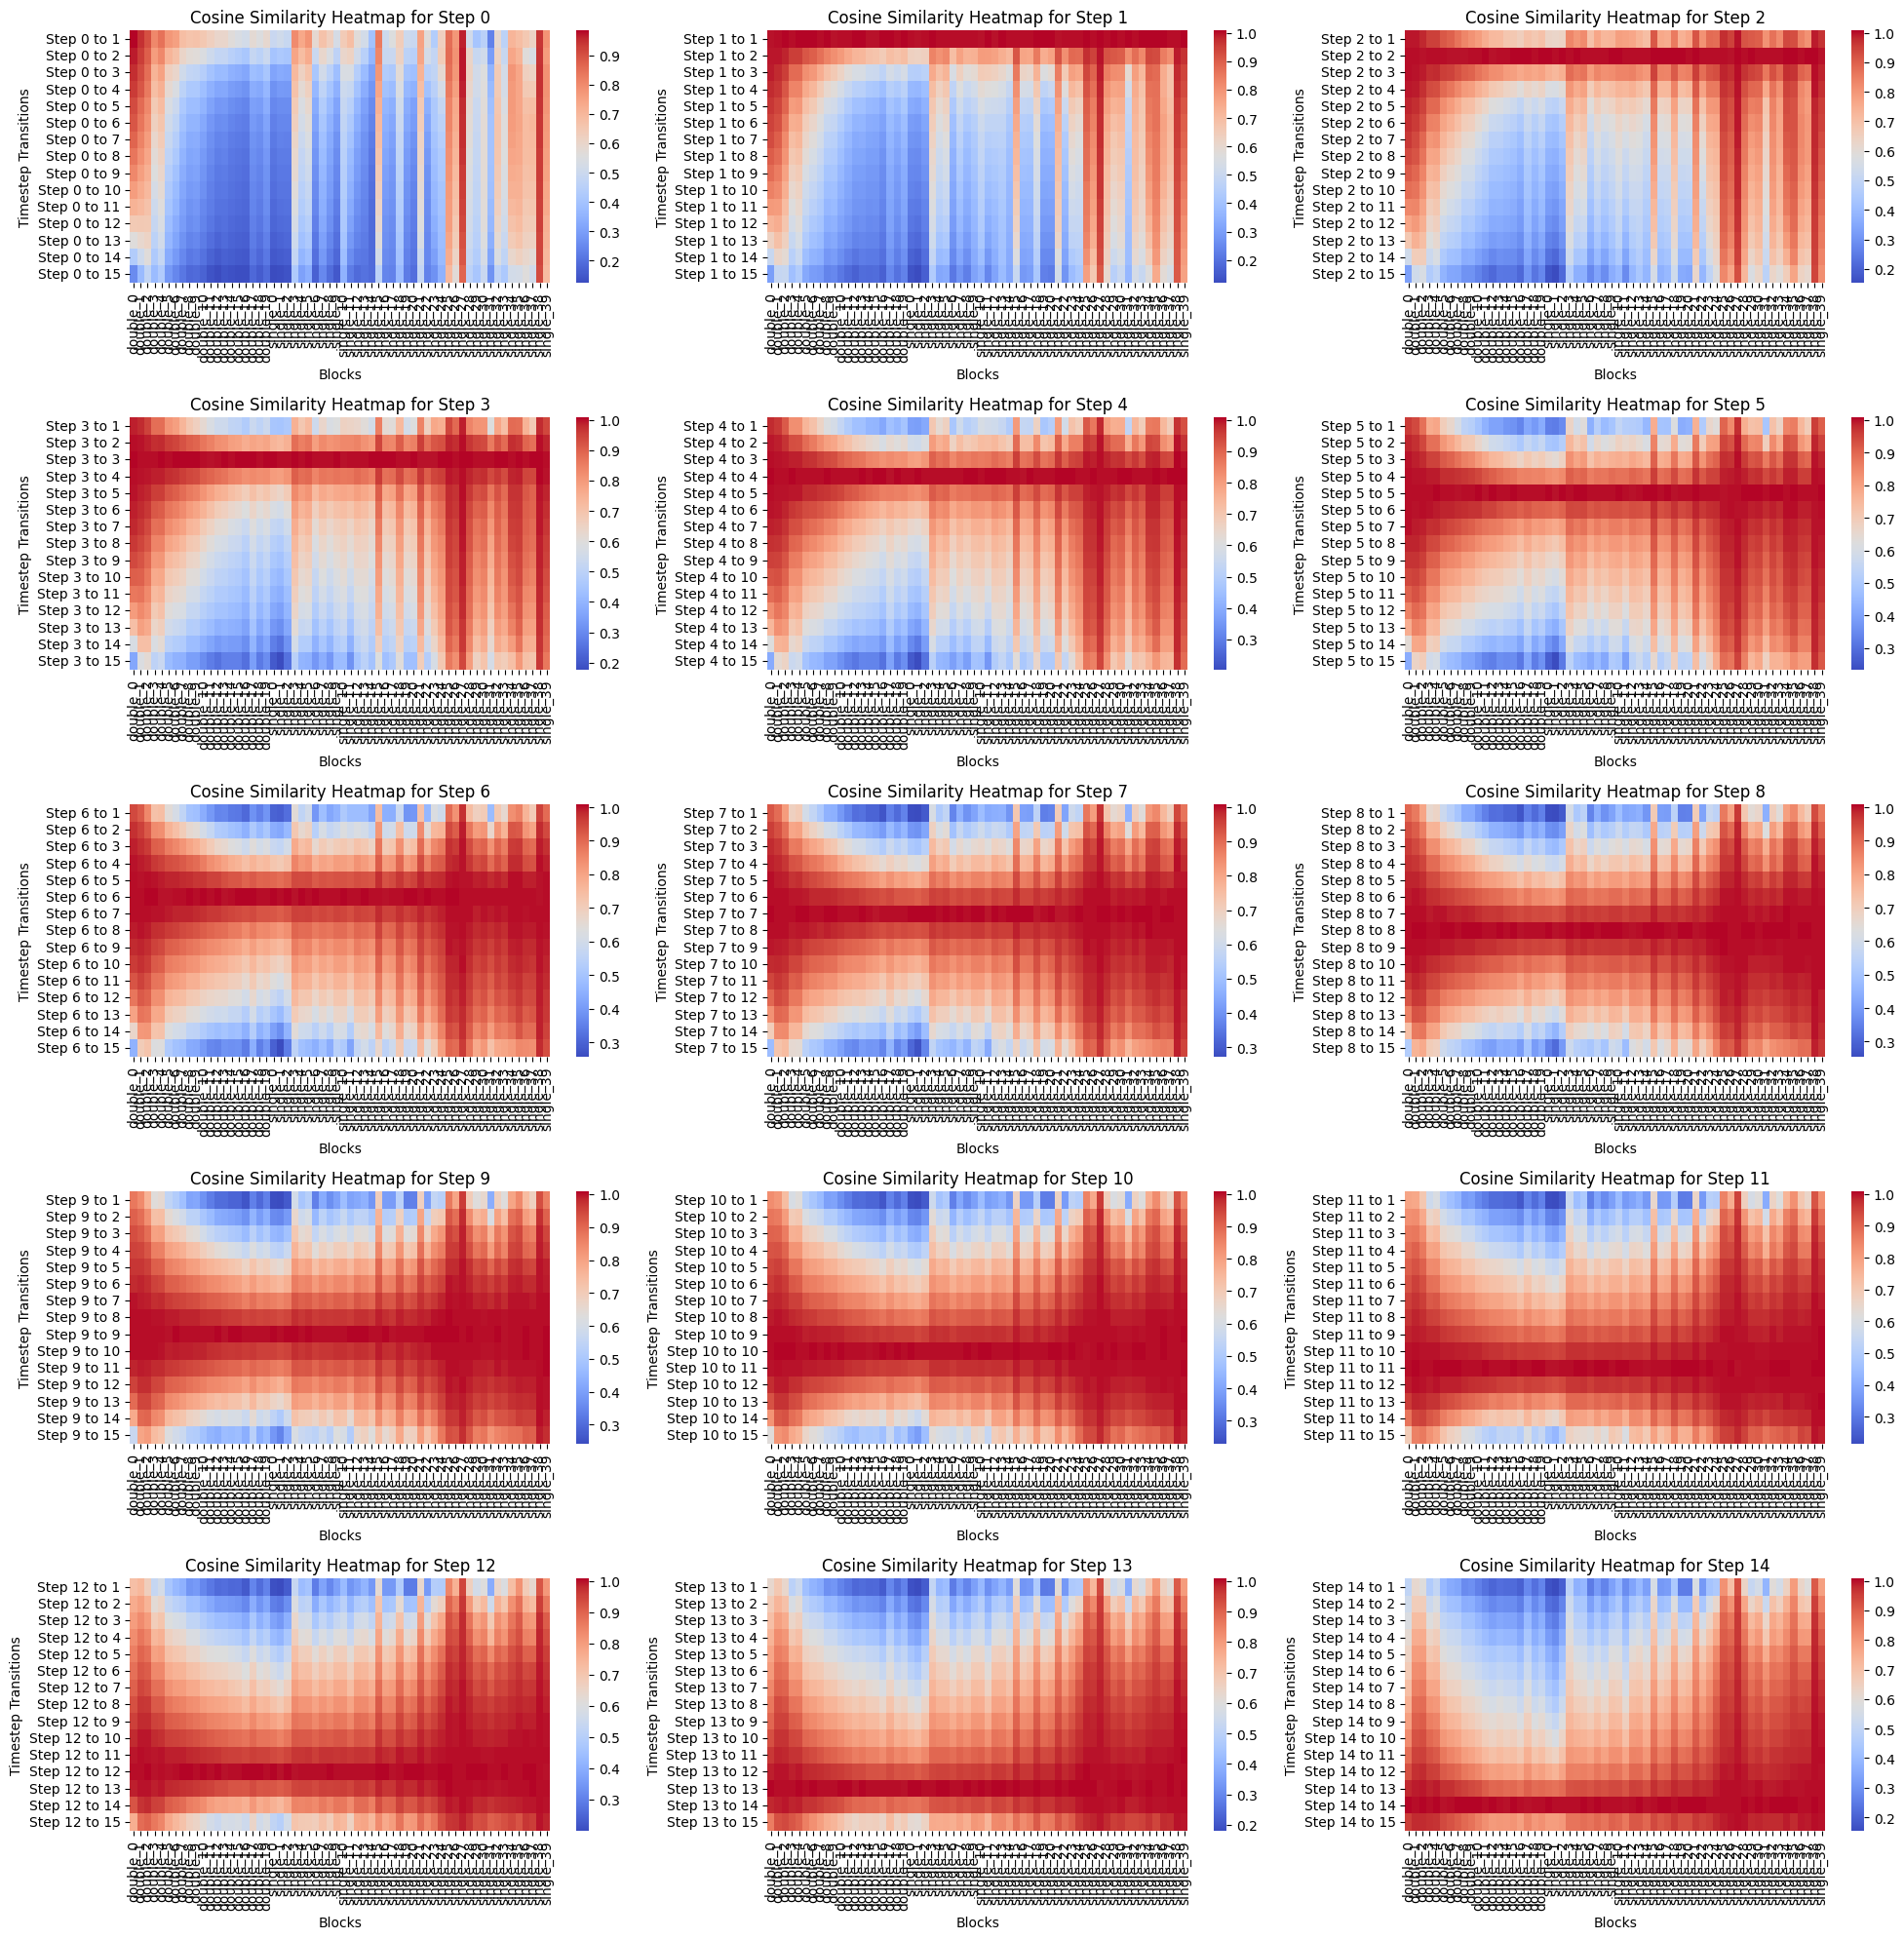

In [ ]:
def plot_full_similarity_heatmap(step, ax):
    num_steps = len(all_v_caches)
    num_blocks = len(block_keys)
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for i in range(num_steps - 1):
        for j, key in enumerate(block_keys):
            v_tensor_t = all_v_caches[step][key]
            v_tensor_t_plus_1 = all_v_caches[i + 1][key]

            v_tensor_t_flat = v_tensor_t.flatten()
            v_tensor_t_plus_1_flat = v_tensor_t_plus_1.flatten()

            similarity = F.cosine_similarity(
                v_tensor_t_flat.unsqueeze(0), 
                v_tensor_t_plus_1_flat.unsqueeze(0)
            )
            full_heatmap_data[i, j] = similarity.item()
    
    sns.heatmap(
        full_heatmap_data,
        xticklabels=block_keys,
        yticklabels=[f"Step {step} to {i+1}" for i in range(num_steps - 1)],
        cmap="coolwarm",
        cbar=True,
        ax=ax
    )
    ax.set_title(f"Cosine Similarity Heatmap for Step {step}")
    ax.set_xlabel("Blocks")
    ax.set_ylabel("Timestep Transitions")


# ---- Subplot construction ----
num_steps = len(all_v_caches) - 1
cols = 3
rows = int(np.ceil(num_steps / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for step in range(num_steps):
    plot_full_similarity_heatmap(step, axes[step])

# Remove unused axes if any
for ax in axes[num_steps:]:
    ax.remove()

plt.tight_layout()
plt.show()
